# Logistic Regression

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
head(dataset)

dataset = dataset[3:5]
head(dataset)

User.ID  Gender Age EstimatedSalary Purchased
1 15624510 Male   19  19000           0        
2 15810944 Male   35  20000           0        
3 15668575 Female 26  43000           0        
4 15603246 Female 27  57000           0        
5 15804002 Male   19  76000           0        
6 15728773 Male   27  58000           0

Age EstimatedSalary Purchased
1 19  19000           0        
2 35  20000           0        
3 26  43000           0        
4 27  57000           0        
5 19  76000           0        
6 27  58000           0

# Encoding the target feature as factor

In [2]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set

In [3]:
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [4]:
summary(training_set)
summary(test_set)

      Age        EstimatedSalary  Purchased
 Min.   :18.00   Min.   : 15000   0:193    
 1st Qu.:30.00   1st Qu.: 43000   1:107    
 Median :37.00   Median : 71000            
 Mean   :37.47   Mean   : 70623            
 3rd Qu.:45.00   3rd Qu.: 88000            
 Max.   :60.00   Max.   :150000            

      Age        EstimatedSalary  Purchased
 Min.   :18.00   Min.   : 15000   0:64     
 1st Qu.:29.00   1st Qu.: 44000   1:36     
 Median :38.00   Median : 62500            
 Mean   :38.22   Mean   : 67100            
 3rd Qu.:46.25   3rd Qu.: 86000            
 Max.   :60.00   Max.   :149000            

# Feature Scaling

In [5]:
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

head(training_set)

Age        EstimatedSalary Purchased
1  -1.7655475 -1.4733414      0        
3  -1.0962966 -0.7883761      0        
6  -1.0006894 -0.3602727      0        
7  -1.0006894  0.3817730      0        
8  -0.5226531  2.2654277      1        
10 -0.2358313 -0.1604912      0

# Fitting Logistic Regression to the Training set

In [6]:
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set)
summary(classifier)


Call:
glm(formula = Purchased ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0753  -0.5235  -0.1161   0.3224   2.3977  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1923     0.2018  -5.908 3.47e-09 ***
Age               2.6324     0.3461   7.606 2.83e-14 ***
EstimatedSalary   1.3947     0.2326   5.996 2.03e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 199.78  on 297  degrees of freedom
AIC: 205.78

Number of Fisher Scoring iterations: 6


# Predicting the Test set results

In [7]:
prob_pred = predict(classifier, type = 'response', newdata = test_set[-3])
y_pred = ifelse(prob_pred > 0.5, 1, 0)

# Making the Confusion Matrix

In [8]:
cm = table(test_set[, 3], y_pred > 0.5)
cm

   
    FALSE TRUE
  0    57    7
  1    10   26

# Visualising the Training set results

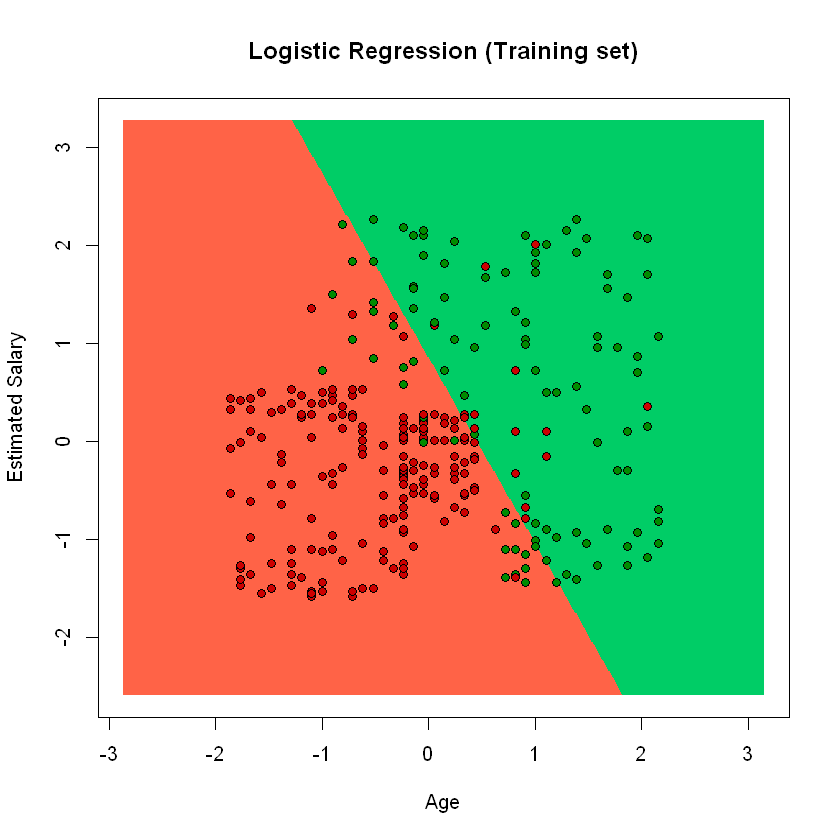

In [9]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results

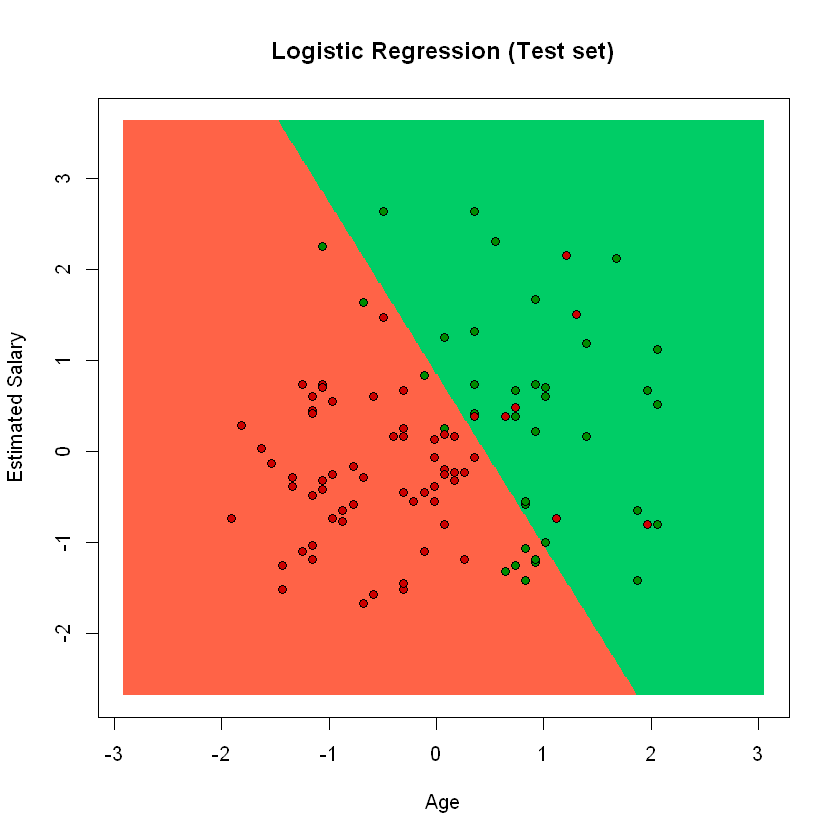

In [10]:
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))